# Income Analysis

In [68]:
%matplotlib notebook

In [69]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [70]:
income_file = "cleaned_income_df.csv"
starter_df = pd.read_csv(income_file)
starter_df.head()

,State_ab,County,City,Type,Zip_Code,Lat,Lon,Mean,Median,Stdev
0,AL,Mobile County,Chickasaw,City,36611,30.771450,-88.079697,38773,30506,33101
1,AL,Barbour County,Louisville,City,36048,31.708516,-85.611039,37725,19528,43789
2,AL,Shelby County,Columbiana,City,35051,33.191452,-86.615618,54606,31930,57348
3,AL,Mobile County,Satsuma,City,36572,30.874343,-88.009442,63919,52814,47707
4,AL,Mobile County,Dauphin Island,Town,36528,30.250913,-88.171268,77948,67225,54270


In [91]:
#combining cities with different spellings
income_df = starter_df.replace({"CARY":"Cary", "Winston Salem":"Winston-Salem", "Winston-salem":"Winston-Salem"})
income_df.head()


,State_ab,County,City,Type,Zip_Code,Lat,Lon,Mean,Median,Stdev
0,AL,Mobile County,Chickasaw,City,36611,30.771450,-88.079697,38773,30506,33101
1,AL,Barbour County,Louisville,City,36048,31.708516,-85.611039,37725,19528,43789
2,AL,Shelby County,Columbiana,City,35051,33.191452,-86.615618,54606,31930,57348
3,AL,Mobile County,Satsuma,City,36572,30.874343,-88.009442,63919,52814,47707
4,AL,Mobile County,Dauphin Island,Town,36528,30.250913,-88.171268,77948,67225,54270


# Grouped by States

In [92]:
#Group by states
state_group_df = income_df.groupby(['State_ab'])
state_group_df.head()

,State_ab,County,City,Type,Zip_Code,Lat,Lon,Mean,Median,Stdev
0,AL,Mobile County,Chickasaw,City,36611,30.771450,-88.079697,38773,30506,33101
1,AL,Barbour County,Louisville,City,36048,31.708516,-85.611039,37725,19528,43789
2,AL,Shelby County,Columbiana,City,35051,33.191452,-86.615618,54606,31930,57348
3,AL,Mobile County,Satsuma,City,36572,30.874343,-88.009442,63919,52814,47707
4,AL,Mobile County,Dauphin Island,Town,36528,30.250913,-88.171268,77948,67225,54270
...,...,...,...,...,...,...,...,...,...,...
31839,PR,Aibonito Municipio,Aibonito,Urban,705,18.139723,-66.265701,22653,15565,20498
31840,PR,Humacao Municipio,Humacao,Community,791,18.160142,-65.783104,19482,12540,18574
31841,PR,Las Piedras Municipio,Las Piedras,Community,771,18.200145,-65.843879,19621,10757,20549
31842,PR,Toa Baja Municipio,Toa Baja,Community,951,18.422877,-66.238312,18816,14583,16280


In [93]:
#Average of Mean and Median Incomes
mean_mean = state_group_df["Mean"].mean()
mean_median = state_group_df["Median"].mean()


In [94]:
#combine into new Dataframe
mean_summary_df = pd.DataFrame({
                                "Mean Income": mean_mean,
                                "Median Income": mean_median})

mean_summary_df.head()

,Mean Income,Median Income
State_ab,,
AK,79178.368932,111026.485437
AL,54023.752874,63252.247126
AR,52213.932153,52536.123894
AZ,63400.114943,80416.218391
CA,78654.297115,101260.922038


<IPython.core.display.Javascript object>


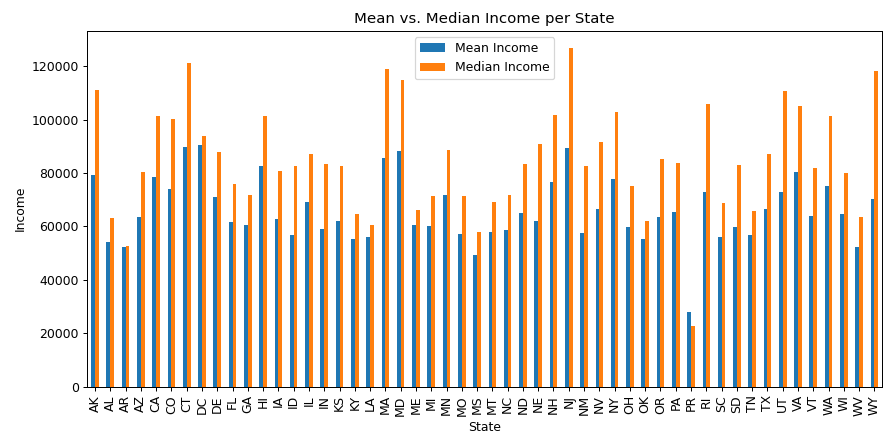

In [95]:
mean_summary_df.plot(kind='bar', figsize=(10,5), title="Mean vs. Median Income per State")
plt.xlabel("State")
plt.ylabel("Income")

plt.tight_layout()
plt.savefig("../Images/Income_comparison_State.png")



In [96]:
%matplotlib notebook

<IPython.core.display.Javascript object>


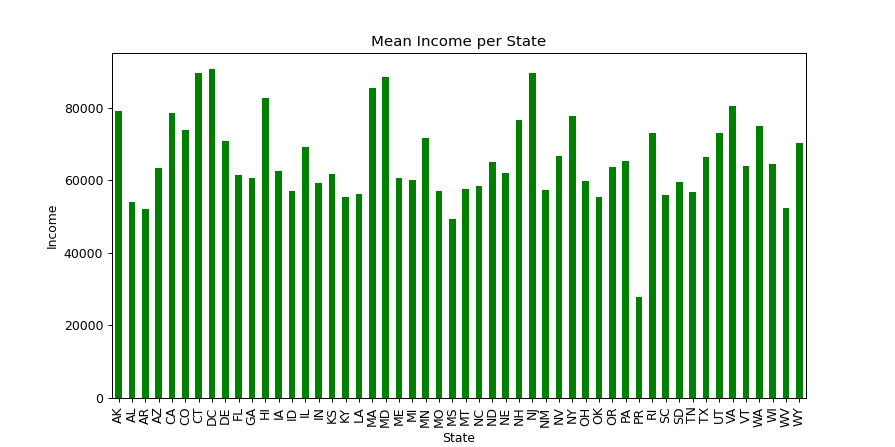

In [97]:
#Mean bar chart
mean_chart = mean_mean.plot(kind='bar', figsize=(10,5), color='green', title="Mean Income per State")

# Set the xlabel and ylabel using class methods
mean_chart.set_xlabel("State")
mean_chart.set_ylabel("Income")

plt.show()
#save image
plt.savefig("../Images/Mean_Income_State.png")

In [98]:
%matplotlib notebook

<IPython.core.display.Javascript object>


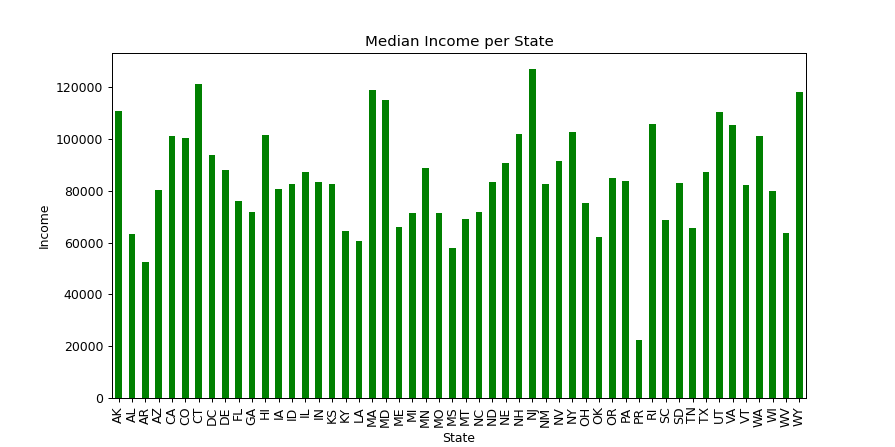

In [99]:
#Median bar chart
median_chart = mean_median.plot(kind='bar', figsize=(10,5), color='green', title="Median Income per State")

# Set the xlabel and ylabel using class methods
median_chart.set_xlabel("State")
median_chart.set_ylabel("Income")

plt.show()
#save image
plt.savefig("../Images/Median_Income_State.png")

# Group by NC Cities

In [100]:
NC_data = income_df.loc[income_df["State_ab"] == "NC", :]
NC_data.head()

,State_ab,County,City,Type,Zip_Code,Lat,Lon,Mean,Median,Stdev
20801,NC,Alamance County,Elon,CDP,27244,36.193878,-79.506646,89973,300000,44245
20802,NC,Johnston County,Wendell,Town,27591,35.682169,-78.370658,67438,300000,38524
20803,NC,Sampson County,Stedman,Town,28391,34.996480,-78.641187,43538,25196,48097
20804,NC,Henderson County,Hendersonville,CDP,28792,35.308483,-82.441167,38120,31430,24810
20805,NC,Beaufort County,Pinetown,Town,27865,35.542961,-76.623111,30468,17951,32450


In [101]:
#Group by cities
city_group_df = NC_data.groupby(['City'])
city_group_df.head()

,State_ab,County,City,Type,Zip_Code,Lat,Lon,Mean,Median,Stdev
20801,NC,Alamance County,Elon,CDP,27244,36.193878,-79.506646,89973,300000,44245
20802,NC,Johnston County,Wendell,Town,27591,35.682169,-78.370658,67438,300000,38524
20803,NC,Sampson County,Stedman,Town,28391,34.996480,-78.641187,43538,25196,48097
20804,NC,Henderson County,Hendersonville,CDP,28792,35.308483,-82.441167,38120,31430,24810
20805,NC,Beaufort County,Pinetown,Town,27865,35.542961,-76.623111,30468,17951,32450
...,...,...,...,...,...,...,...,...,...,...
21698,NC,Alamance County,Dunn,Track,28334,35.347598,-78.603441,42184,29462,39917
21699,NC,Alamance County,Angier,Track,27501,35.478482,-78.750110,63548,47054,53454
21700,NC,Alamance County,Olivia,Track,28368,35.363326,-79.042229,50021,37387,42265
21701,NC,Alamance County,Clyde,Track,28721,35.545566,-82.916135,45694,29938,40870


In [102]:
#Average of Mean and Median Incomes
City_mean_mean = city_group_df["Mean"].mean()
City_mean_median = city_group_df["Median"].mean()

#combine into new Dataframe
City_mean_summary_df = pd.DataFrame({
                                "Mean Income": City_mean_mean,
                                "Median Income": City_mean_median})

City_mean_summary_df.head()

,Mean Income,Median Income
City,,
Aberdeen,71839.000000,61786.0
Advance,96650.000000,60938.0
Ahoskie,51360.000000,41196.0
Albemarle,61027.666667,51923.0
Andrews,39213.000000,34122.0


In [103]:
#sort for highest average Mean income by Cities
City_mean_summary_sorted = City_mean_summary_df.sort_values("Mean Income", ascending=False)
City_mean_summary_sorted["Mean Income"]= City_mean_summary_sorted["Mean Income"].map("${:.2f}".format)
City_mean_summary_sorted["Median Income"]= City_mean_summary_sorted["Median Income"].map("${:.2f}".format)
City_mean_summary_sorted.head(6)

,Mean Income,Median Income
City,,
Davidson,$140057.00,$142838.00
Summerfield,$120146.00,$108197.00
Apex,$113786.50,$208028.00
Cary,$109838.14,$149078.93
Morrisville,$106140.00,$98872.00
Denver,$100443.33,$227776.67


In [104]:
#sort for highest average Median income by Cities
City_median_summary_sorted = City_mean_summary_df.sort_values("Median Income", ascending=False)
City_median_summary_sorted["Mean Income"]= City_median_summary_sorted["Mean Income"].map("${:.2f}".format)
City_median_summary_sorted["Median Income"]= City_median_summary_sorted["Median Income"].map("${:.2f}".format)
City_median_summary_sorted.head(6)

,Mean Income,Median Income
City,,
Elon,$89973.00,$300000.00
Cramerton,$69510.00,$300000.00
Rose Hill,$48716.00,$300000.00
Buxton,$35595.00,$300000.00
Snow Camp,$52843.00,$300000.00
Faison,$35652.00,$300000.00


In [105]:
%matplotlib notebook

<IPython.core.display.Javascript object>


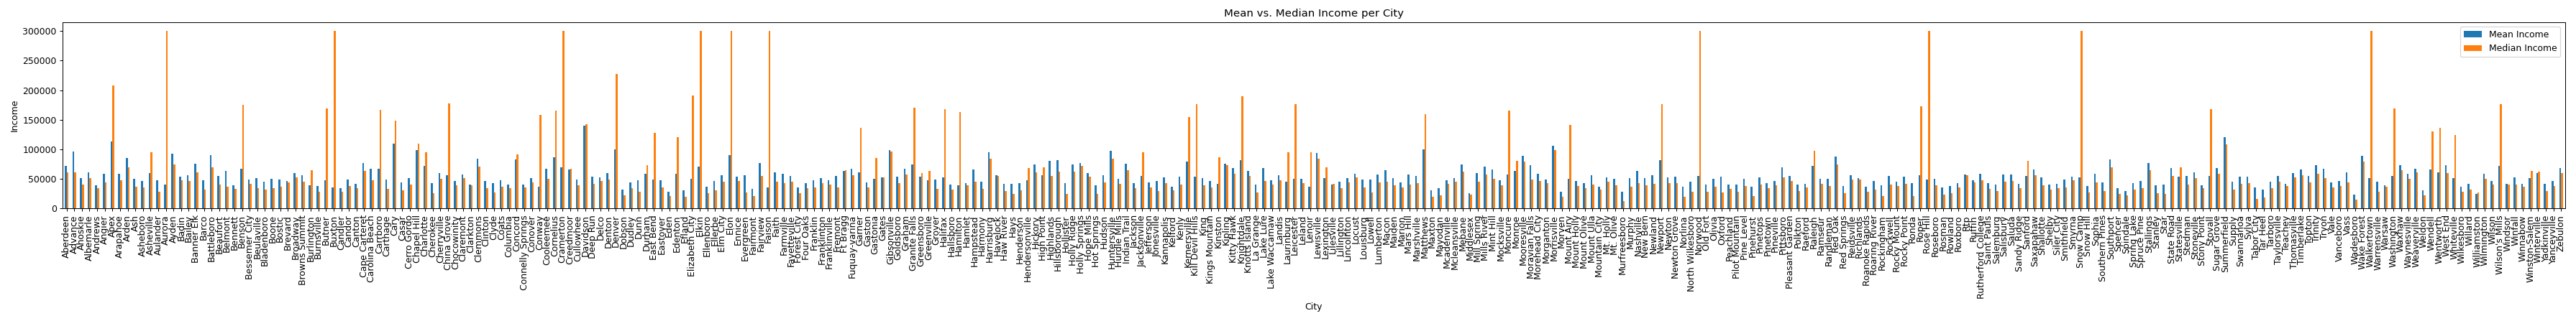

In [106]:
City_mean_summary_df.plot(kind='bar', figsize=(40,5), title="Mean vs. Median Income per City")
plt.xlabel("City")
plt.ylabel("Income")

plt.tight_layout()
plt.savefig("../Images/Income_comparison_City.png")



In [107]:
%matplotlib notebook

<IPython.core.display.Javascript object>


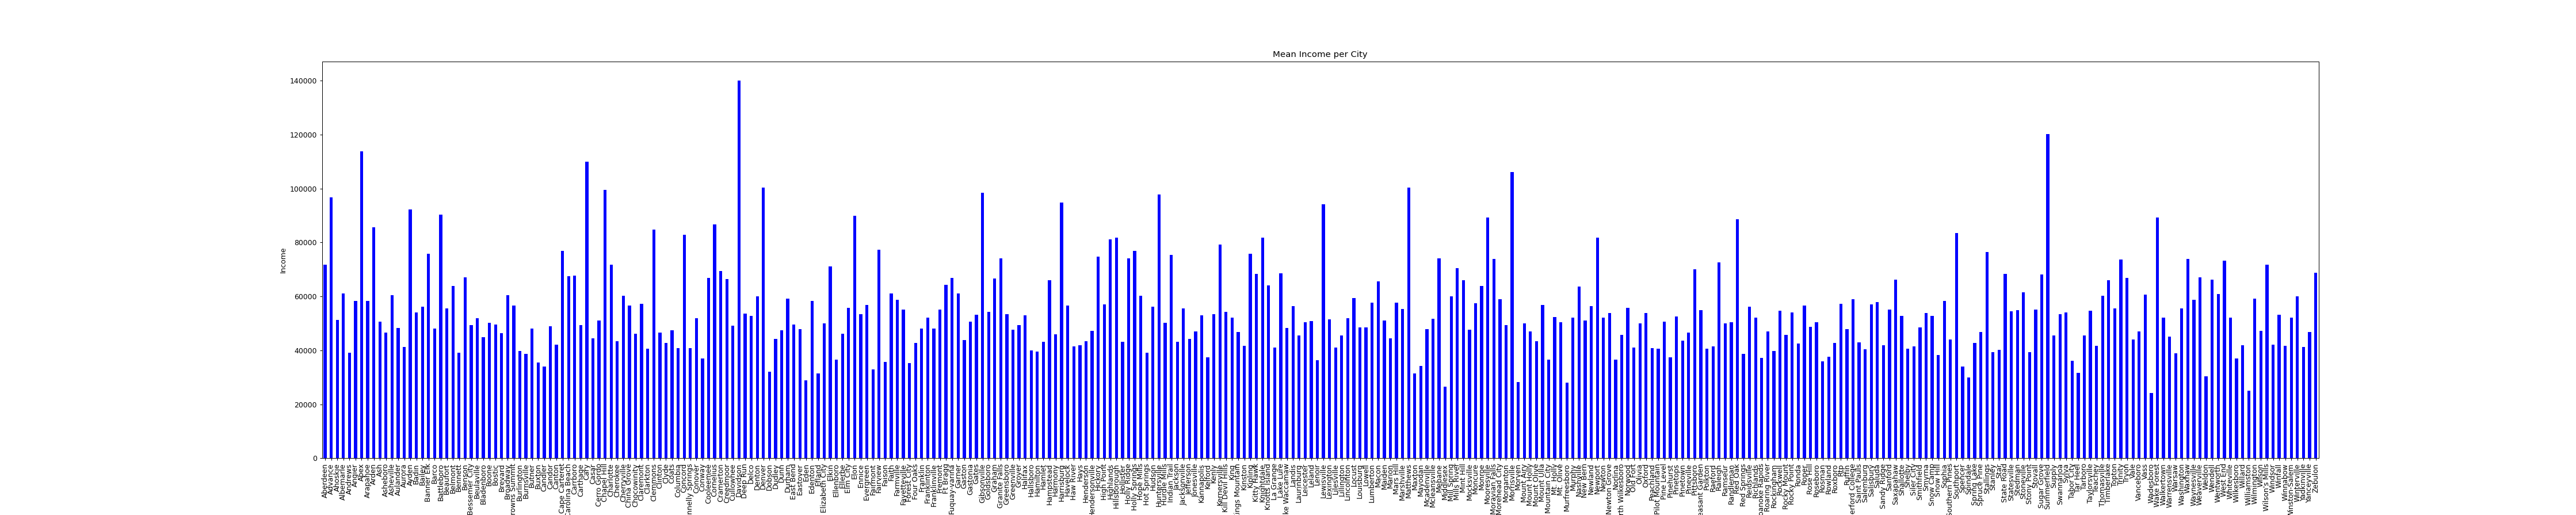

In [108]:
#Mean bar chart
City_mean_mean_chart = City_mean_mean.plot(kind='bar', figsize=(50,10), color='blue', title="Mean Income per City")

# Set the xlabel and ylabel using class methods
City_mean_mean_chart.set_xlabel("City")
City_mean_mean_chart.set_ylabel("Income")

plt.show()
#save image
plt.savefig("../Images/Mean_Income_City.png")

In [109]:
%matplotlib notebook

<IPython.core.display.Javascript object>


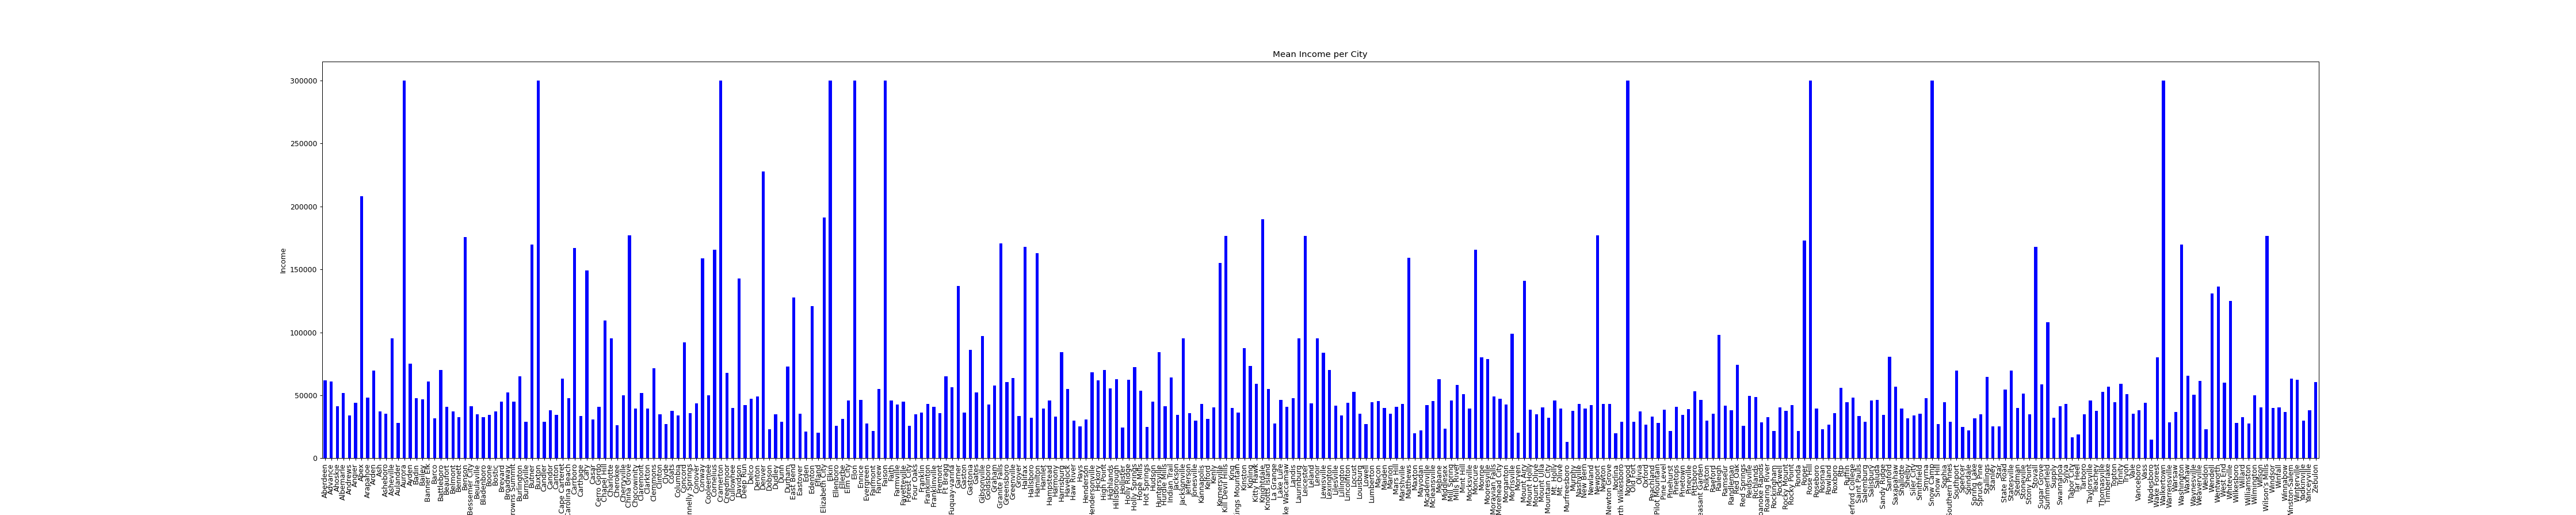

In [110]:
#Median bar chart
City_mean_median_chart = City_mean_median.plot(kind='bar', figsize=(50,10), color='blue', title="Mean Income per City")

# Set the xlabel and ylabel using class methods
City_mean_median_chart.set_xlabel("City")
City_mean_median_chart.set_ylabel("Income")

plt.show()
#save image
plt.savefig("../Images/Median_Income_City.png")

# Group by  NC Zip

In [111]:
NC_data = income_df.loc[income_df["State_ab"] == "NC", :]
NC_data.head()

,State_ab,County,City,Type,Zip_Code,Lat,Lon,Mean,Median,Stdev
20801,NC,Alamance County,Elon,CDP,27244,36.193878,-79.506646,89973,300000,44245
20802,NC,Johnston County,Wendell,Town,27591,35.682169,-78.370658,67438,300000,38524
20803,NC,Sampson County,Stedman,Town,28391,34.996480,-78.641187,43538,25196,48097
20804,NC,Henderson County,Hendersonville,CDP,28792,35.308483,-82.441167,38120,31430,24810
20805,NC,Beaufort County,Pinetown,Town,27865,35.542961,-76.623111,30468,17951,32450


In [112]:
#Group by Zip Code
Zip_group_df = NC_data.groupby(['Zip_Code'])
Zip_group_df.head()



,State_ab,County,City,Type,Zip_Code,Lat,Lon,Mean,Median,Stdev
20801,NC,Alamance County,Elon,CDP,27244,36.193878,-79.506646,89973,300000,44245
20802,NC,Johnston County,Wendell,Town,27591,35.682169,-78.370658,67438,300000,38524
20803,NC,Sampson County,Stedman,Town,28391,34.996480,-78.641187,43538,25196,48097
20804,NC,Henderson County,Hendersonville,CDP,28792,35.308483,-82.441167,38120,31430,24810
20805,NC,Beaufort County,Pinetown,Town,27865,35.542961,-76.623111,30468,17951,32450
...,...,...,...,...,...,...,...,...,...,...
21698,NC,Alamance County,Dunn,Track,28334,35.347598,-78.603441,42184,29462,39917
21699,NC,Alamance County,Angier,Track,27501,35.478482,-78.750110,63548,47054,53454
21700,NC,Alamance County,Olivia,Track,28368,35.363326,-79.042229,50021,37387,42265
21701,NC,Alamance County,Clyde,Track,28721,35.545566,-82.916135,45694,29938,40870


In [113]:
#Average of Mean and Median Incomes
Zip_mean_mean = Zip_group_df["Mean"].mean()
Zip_mean_median = Zip_group_df["Median"].mean()

#combine into new Dataframe
Zip_mean_summary_df = pd.DataFrame({
                                "Mean Income": Zip_mean_mean,
                                "Median Income": Zip_mean_median})

Zip_mean_summary_df.head()

,Mean Income,Median Income
Zip_Code,,
27006,96650.000000,60938.00
27012,84668.250000,71534.25
27014,66831.000000,50242.00
27017,32108.000000,22956.00
27018,49589.333333,127604.00


In [114]:
#sort for highest average Mean income by Zip
Zip_mean_summary_sorted = Zip_mean_summary_df.sort_values("Mean Income", ascending=False)
Zip_mean_summary_sorted["Mean Income"]= Zip_mean_summary_sorted["Mean Income"].map("${:.2f}".format)
Zip_mean_summary_sorted["Median Income"]= Zip_mean_summary_sorted["Median Income"].map("${:.2f}".format)
Zip_mean_summary_sorted.head(6)

,Mean Income,Median Income
Zip_Code,,
28207,$187131.00,$211829.00
27608,$141168.00,$300000.00
28036,$140057.00,$142838.00
27519,$139580.25,$219159.50
27409,$137903.00,$131232.00
28226,$131693.00,$118927.00


In [115]:
#sort for highest average Median income by Zip
Zip_median_summary_sorted = Zip_mean_summary_df.sort_values("Median Income", ascending=False)
Zip_median_summary_sorted["Mean Income"]= Zip_median_summary_sorted["Mean Income"].map("${:.2f}".format)
Zip_median_summary_sorted["Median Income"]= Zip_median_summary_sorted["Median Income"].map("${:.2f}".format)
Zip_median_summary_sorted.head(6)

,Mean Income,Median Income
Zip_Code,,
28204,$129689.00,$300000.00
27920,$35595.00,$300000.00
27244,$89973.00,$300000.00
27889,$52154.00,$300000.00
28458,$48716.00,$300000.00
28621,$71109.00,$300000.00


In [116]:
%matplotlib notebook

<IPython.core.display.Javascript object>


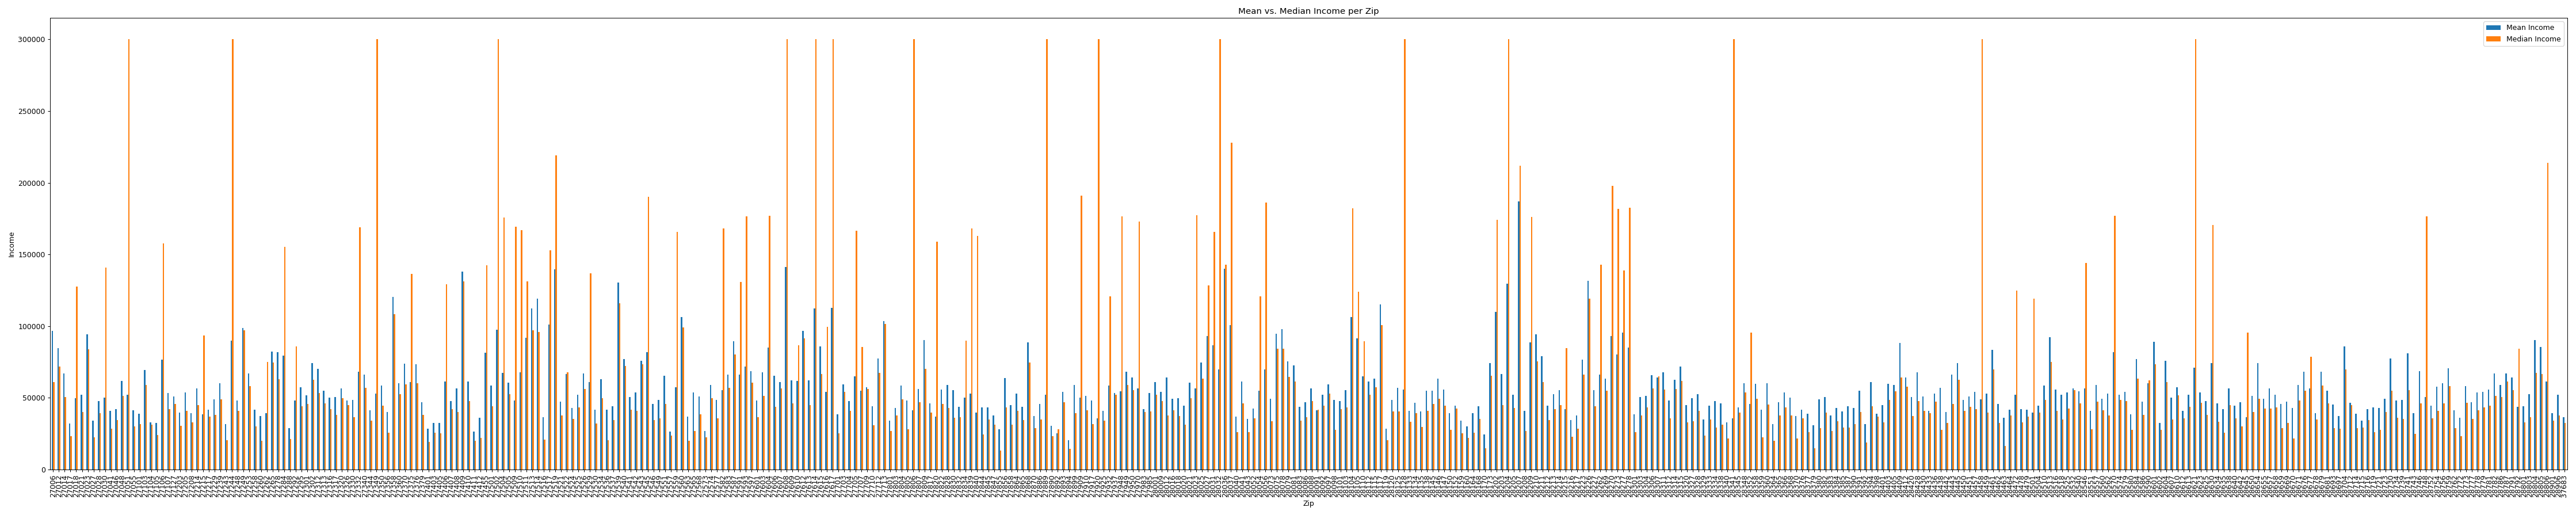

In [117]:
Zip_mean_summary_df.plot(kind='bar', figsize=(50,10), title="Mean vs. Median Income per Zip")
plt.xlabel("Zip")
plt.ylabel("Income")

plt.tight_layout()
plt.savefig("../Images/Income_comparison_Zip.png")


In [118]:
%matplotlib notebook

<IPython.core.display.Javascript object>


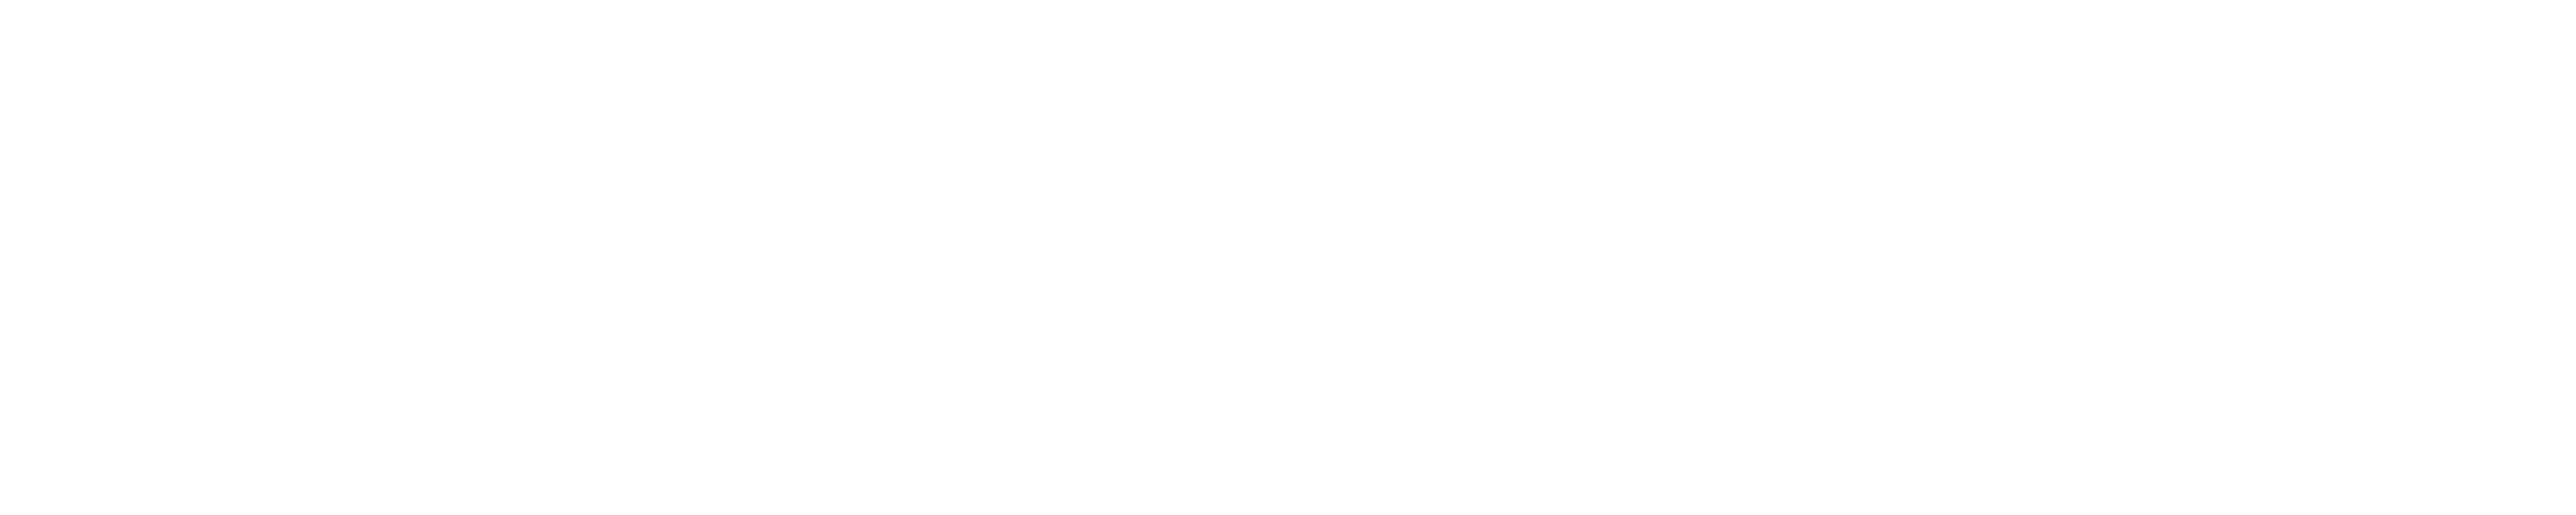

In [119]:
#Mean bar chart
Zip_mean_mean_chart = Zip_mean_mean.plot(kind='bar', figsize=(50,10), color='cyan', title="Mean Income per City")

# Set the xlabel and ylabel using class methods
Zip_mean_mean_chart.set_xlabel("Zip")
Zip_mean_mean_chart.set_ylabel("Income")

plt.show()
#save image
plt.savefig("../Images/Mean_Income_Zip.png")

In [120]:
%matplotlib notebook

<IPython.core.display.Javascript object>


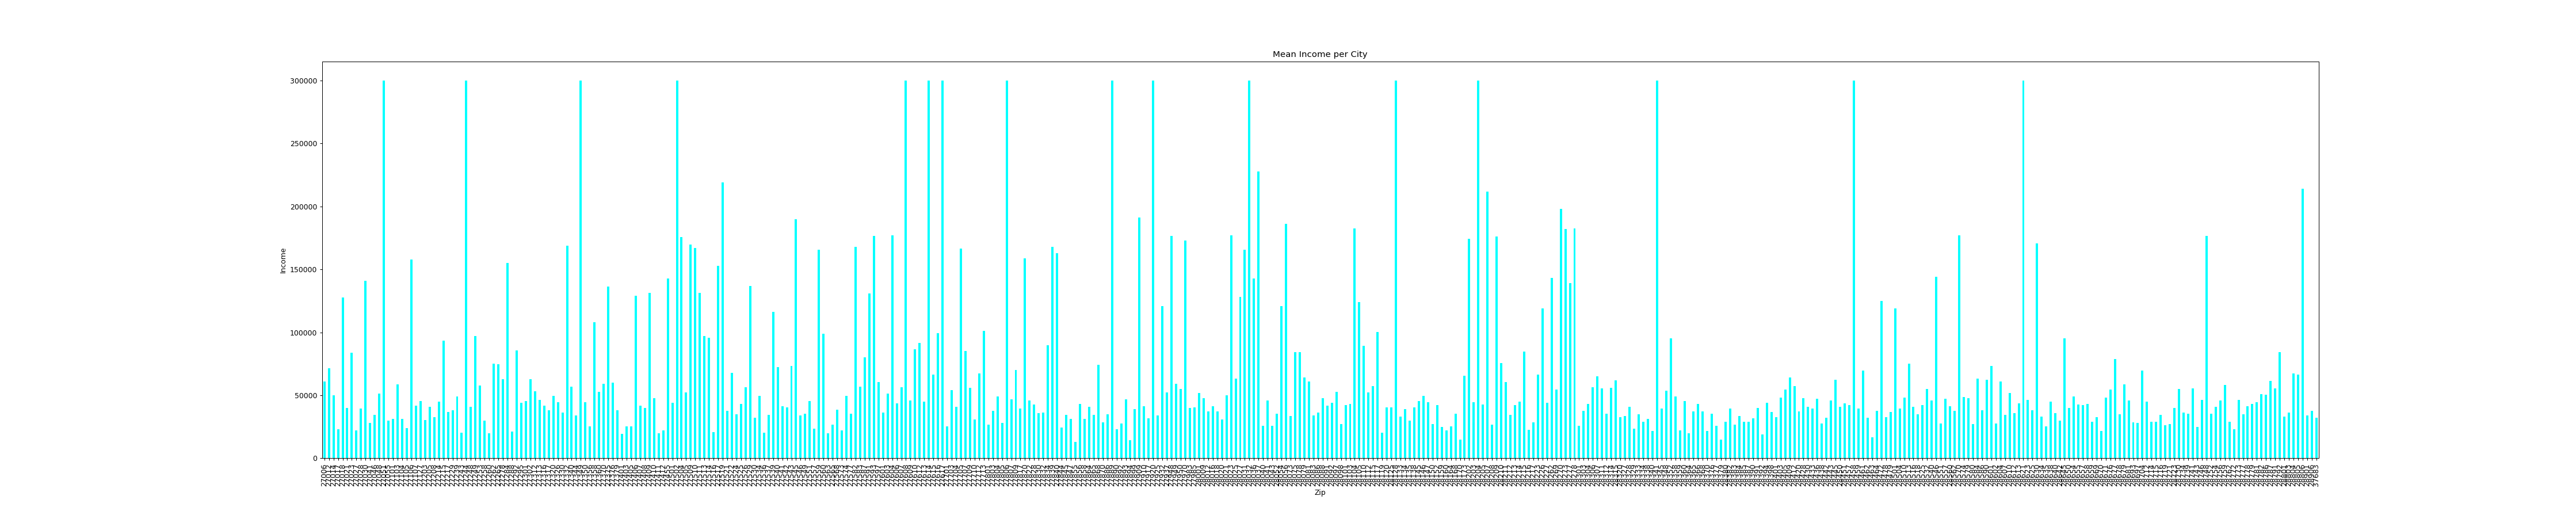

In [121]:
#Median bar chart
Zip_mean_median_chart = Zip_mean_median.plot(kind='bar', figsize=(50,10), color='cyan', title="Mean Income per City")

# Set the xlabel and ylabel using class methods
Zip_mean_median_chart.set_xlabel("Zip")
Zip_mean_median_chart.set_ylabel("Income")

plt.show()
#save image
plt.savefig("../Images/Median_Income_Zip.png")